In [1]:
import pandas as pd
import numpy as np

import spacy
import random
from spacy.util import minibatch, compounding
from spacy.gold import biluo_tags_from_offsets

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
df = pd.read_csv('./location_articles.csv')

In [113]:
# Load the base English model
nlp = spacy.blank("en")

# Create and add the NER pipeline
ner = nlp.create_pipe("ner")
nlp.add_pipe(ner, last=True)

# Define your labels (e.g., "LOCATION")
labels = ['LOC']

# Load and preprocess your training data
train_data = []
for body, entities in zip(df['body'], df['entities']):
    entities = eval(entities)
    train_data.append((body, {"entities": entities}))

# train_data = train_data[:500]

# Initialize the NER model with the labels
for label in labels:
    ner.add_label(label)

# Train the NER model
optimizer = nlp.begin_training()
for itn in range(10):  # Adjust the number of iterations as needed
    random.shuffle(train_data)
    losses = {}
    for text, annotations in train_data:
        nlp.update([text], [annotations], drop=0.3, losses=losses)
    print("Iteration:", itn+1, "Loss:", losses)

# Save the trained model
nlp.to_disk("trained_model")


C:\Users\Matthew Kenely\AppData\Roaming\Python\Python37\site-packages\spacy\language.py:639: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  **kwargs
C:\Users\Matthew Kenely\AppData\Roaming\Python\Python37\site-packages\spacy\language.py:639: UserWarning: [W034] Please install the package spacy-lookups-data in order to include the default lexeme normalization table for the language 'en'.
  **kwargs
C:\Users\Matthew Kenely\AppData\Roaming\Python\Python37\site-packages\spacy\language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "Mass Rally fi Pjazza San Ġorġ indirizzat mill-Kap ..." with entities "[(293, 301, 'LOC'), (2456, 2464, 'LOC'), (2566, 25...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misa

Iteration: 1 Loss: {'ner': 4966.054097899391}
Iteration: 2 Loss: {'ner': 350.22466909004163}
Iteration: 3 Loss: {'ner': 304.67420678725495}
Iteration: 4 Loss: {'ner': 252.50606971857985}
Iteration: 5 Loss: {'ner': 275.1590056246673}
Iteration: 6 Loss: {'ner': 253.55966510487127}
Iteration: 7 Loss: {'ner': 218.1444039745277}
Iteration: 8 Loss: {'ner': 171.69634813924912}
Iteration: 9 Loss: {'ner': 199.96594203469544}
Iteration: 10 Loss: {'ner': 191.4460061674813}


In [6]:
# Load the trained model
nlp = spacy.load("trained_model")

# Test the trained model on new article text
text = "I'd like to go to Valletta and eat there."
doc = nlp(text)
entities = [(ent.text, ent.label_) for ent in doc.ents]
# predict location of text

print(entities)

[('Valletta', 'LOC')]


In [115]:
test = df.loc[0]

In [116]:
test.body

'In preparation for the solemnity of Pentecost when we celebrate the descent of the Holy Spirit and the birth of the church the traditional devotion of the Easter season the Via Lucis or Way of Light will be prayed at St Joseph the Worker Parish Church Birkirkara on Saturday May 20 at 8pm Everyone is invited to join in the contemplation of these 14 Stations of Light Each gospel passage will be proclaimed in 14 different languages to remind that while different we are all one in the power of the Holy Spirit More information on evangelisationmaltadioceseorg'

In [117]:
eval(test.entities)

[(252, 262, 'LOC')]

In [118]:
doc = nlp.make_doc(test.body)
tags = biluo_tags_from_offsets(doc, eval(test.entities))
print(tags)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'U-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
import string
''.join([i for i in '‘No one believes you’ on hospitals fiasco, Grech tells Labour MPs' if i not in string.punctuation])

'‘No one believes you’ on hospitals fiasco Grech tells Labour MPs'

In [5]:
p = string.punctuation

In [6]:
p += ';'

In [15]:
with open('filter.txt', 'r') as f:
    x = f.readlines()
    print([i.strip() for i in x])


['drug', 'kill']


In [20]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./location_articles.csv')

In [12]:
all_locs = []

for l in df['location']:
    for i in eval(l):
        all_locs.append(i)


In [13]:
loc_freqs = {}

for i in all_locs:
    if i in loc_freqs:
        loc_freqs[i] += 1
    else:
        loc_freqs[i] = 1
        



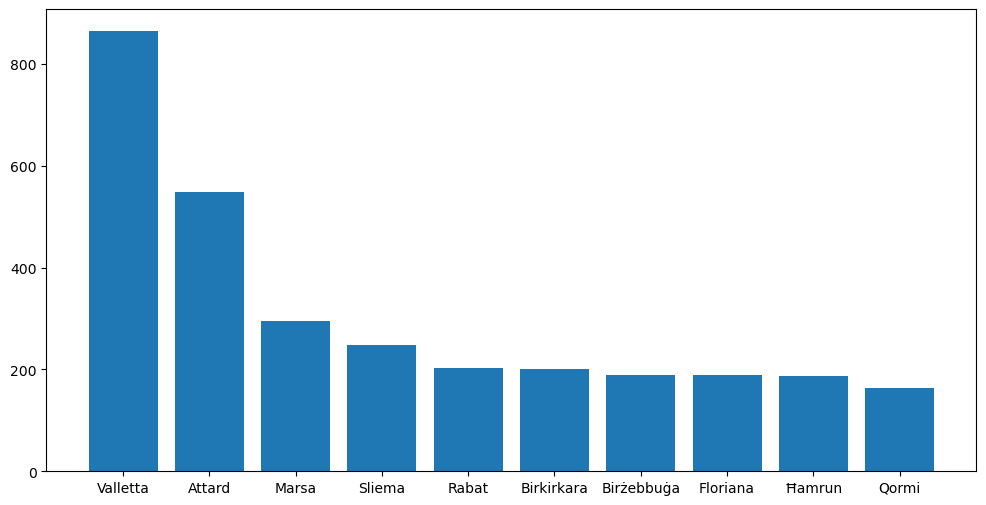

In [36]:
loc_freqs = {k: v for k, v in sorted(loc_freqs.items(), key=lambda item: item[1], reverse=True)}

# bar plot plt
plt.bar(list(loc_freqs.keys())[:10], list(loc_freqs.values())[:10])

# rotate x axis labels
# plt.xticks(rotation=90)

# increase fig size
plt.rcParams["figure.figsize"] = (12, 6)

plt.show()